## Learning Analytics 2019 - Ατομική Εργασία

## <span style="color:green">PART I</span>

### <span style="color:green">Explanatory modelling: Applying statistical controls</span>

In this part of the project we will be analyzing data applying the 'explanatory modelling' approach.
The data are to be found in the 'DataSamples.xlsx' file. This file contains several sheets. 
Please **be sure to load the correct sheet assigned to you.** 

The data in each sheet contain the following fields:

    CONTROL: Numerical variable, Students' grades in 'Control' group
    TREATMENT: Numerical variable, Students' grades in 'Treatment' group
    
The data come from some experimentation in a learning setting where the factor X was applied only to the 'treatment' group. Your task is to identify whether there is a significant difference between the data of the two groups available in your worksheet. 

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Learning Analytics skills!


### Data and Setup

____
**Import numpy and pandas**

In [94]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline**

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

**Read in the DataSamples.xlsx file as a dataframe called df**

In [96]:
df = pd.read_excel("DataSamples.xlsx", sheet_name="GROUP-3")

**Present information about df**

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
CONTROL      32 non-null int64
TREATMENT    27 non-null float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


**Check the head of df**

In [98]:
df.head()

,CONTROL,TREATMENT
0,28,21.0
1,24,25.0
2,25,25.0
3,18,22.0
4,21,24.0


**What are the top 5 entries for.. ?**

In [99]:
df.sort_values(by='CONTROL', ascending = 0).head()

,CONTROL,TREATMENT
9,32,23.0
27,32,NaN
20,30,25.0
16,29,27.0
26,29,27.0


**Take a look at... column, how many unique title codes are there?**

In [100]:
df['CONTROL'].nunique()

13

**Handle missing data**

In [101]:
mean = df['TREATMENT'].mean()
df_new = df.fillna(mean)
df_new = df_new.round()

**Present basic descriptive statistics of your data**

In [10]:
df_new.describe()

,CONTROL,TREATMENT
count,32.000000,32.000000
mean,24.281250,24.312500
std,4.705757,2.900918
min,11.000000,19.000000
25%,22.000000,22.750000
50%,24.500000,24.000000
75%,28.000000,26.000000
max,32.000000,31.000000


**Present histogram graph for both samples**

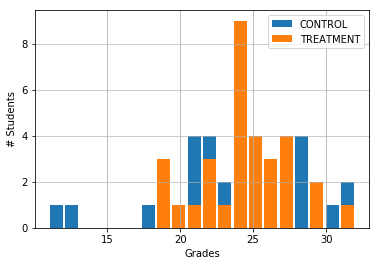

In [17]:
size, scale = 1000, 10
df_new.plot.hist(grid = True, bins = 20, rwidth = 0.85)
plt.xlabel('Grades')
plt.ylabel('# Students')
plt.grid(axis='y', alpha = 0.8)

**Explore correlation between the two samples. Present scatterplot graph and write your conclusions**

0.11150654308838498 0.5434661500015306


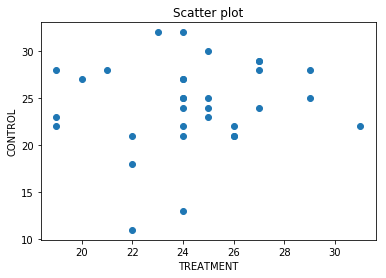

In [18]:
import scipy.stats as st

cor, p = st.pearsonr(df_new['TREATMENT'], df_new['CONTROL'])

plt.scatter(df_new['TREATMENT'],df_new['CONTROL'])
plt.title('Scatter plot')
plt.xlabel('TREATMENT')
plt.ylabel('CONTROL')

print(cor, p)

#We notice that our p is 0.54 > 0.05, so we don't have a significant finding
#and there is no correlation between our two samples(Control - Treatment)

**Check data for normality criterion and write your conclusions**

In [19]:
print ('Normality Control:',round(st.shapiro(df_new.CONTROL)[1],4))
print ('Normality Treatment:',round(st.shapiro(df_new.TREATMENT)[1],4))

#Normality for both Control and Treatment is > 0.05 (0.0539 > 0.05 & 0.2704 > 0.05) and so 
#the assumption of normality for the two samples is met

Normality Control: 0.0539
Normality Treatment: 0.2703


**Check data for Variance criterion and write your conclusions**

In [23]:
print ('Between group variance:',st.levene(df_new.CONTROL,df_new.TREATMENT)[1])

#The homogeneity of the variance assumption is violated as the variance result of the levene test is rounded up to 0.03
#which is smaller that 0.05 (0.0321 < 0.05 = p)

Between group variance: 0.03218215548409478


**Implement both parametric and non-parametric controls to check for significant difference between groups**

In [31]:
#Parametric independent t-test
t,p = st.ttest_ind(df_new.CONTROL,df_new.TREATMENT) 
print('t=',round(t,4),'p=',round(p,4))
if p<=0.05:
    print('t-test result: Sig.')
else:
    print('t-test result: Not sig.')


#Non-parametric Kruskal-Wallis H-test
stat, p_value = st.kruskal(df_new['CONTROL'],df_new['TREATMENT'])
print('stat=',round(stat,4),'p=',round(p_value,4))
if p_value<=0.05:
    print('Kruskal result: Sig.')
else:
    print('Kruskal result: Not sig.')

#There is no significant finding between the two samples

t= -0.032 p= 0.9746
t-test result: Not sig.
stat= 0.0844 p= 0.7715
Kruskal result: Not sig.


**Write your conclusions**

(Do not forget to report here your id number that identifies the datasheet you are working with) 

In [33]:
# My id number is = 3
#An independent-samples t-test and a Kruskal-Wallis H-test were conducted 
#to compare the effects of the X-factor for the two separate groups of students,
#Control and Treatment. There was NOT a significant difference in the values
#between those to groups, as the p-value for the t-test was 0.97>0.05 and
#the p-value for the Kruskal test was 0.77>0.05.
#So the X-factor did not have a significant effect on the students that
#it was implemented on in relation to the other group.

## <span style="color:green">PART II </span>

### <span style="color:green">Predictive modelling: Regression</span>

In this part of the project you are going to implement predictive techniques and regression algorithms.
The EAY2018.xlsx file contains students' grades for online quizes and final exams they took for the course "Human-Computer Interaction".
- The data columns are as follows:
    
    - B1: students' grades in the first online quiz
    - B2: students' grades in the second online quiz
    - B3: students' grades in the third online quiz
    - B4: students' grades in the fourth online quiz
    - Bqzfin: students' grades in the FINAL online quiz
    - Btel: students' grades in the COURSE (based on additional forms of assessment)  


- Your task is: 
    - Compute the mean student grade (Bqmn) across all four online quizes
    - Explore whether Bqmn is a predictor of students grade for the final quiz (Bqzfin)
    - Explore whether Bqzfin is a predictor of students grade for the Course
  
  
- The above task needs to be done twice: 
    - a) The rows (students) with missing values are dropped
    - b) The rows (students) with missing values are filled in with the mean value of the available quiz grades for the student (ths holds for cells in columns B1, B2, B3 and B4. Be careful how you handle the Bqzfin column)
    
Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Learning Analytics skills!


____
**Import all necessary libraries**

In [102]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

**Read in the EAY2018.xlsx file**

In [103]:
df = pd.read_excel("EAY2018.xlsx")

### A) Prepare a df by droping all rows with missing data (df_drop)

In [104]:
df_drop = df.dropna()
df_drop

,Student,B1,B2,B3,B4,Bqzfin,Btel
3,s4,6.666667,4.615385,6.0,7.0,7.0,9.0
4,s5,9.444444,9.230769,9.0,10.0,7.0,9.0
17,s18,9.444444,4.615385,6.0,7.0,6.0,9.0
38,s39,8.333333,7.692308,10.0,9.0,9.0,9.0
52,s53,3.888889,2.307692,6.0,7.0,5.0,9.0
58,s59,4.444444,0.769231,2.0,3.0,9.0,8.0
59,s60,8.888889,3.846154,5.0,6.0,7.0,9.0
63,s64,5.555556,4.615385,8.0,4.0,5.0,7.0
65,s66,8.333333,5.384615,6.0,4.0,8.0,9.0
68,s69,8.888889,6.923077,7.0,9.0,10.0,10.0


**A.1) Explore whether Bqmn is a predictor of students grade for the final quiz (Bqzfin)**

cor coef=  0.02835190624193039  p =  0.8861221704287497
slope: 0.028922, intercept: 7.278483
r_value: 0.028352, p_value: 0.886122
std_err: 0.199981
r-squared (determination coef): 0.000804
Bqzfin mean = 7.464285714285714


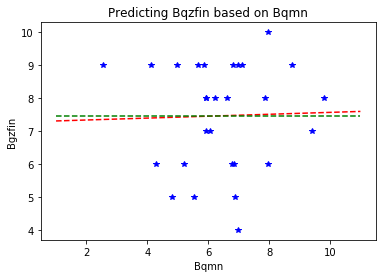

In [115]:
df_drop = df_drop.assign(Bqmn = df_drop.iloc[:,1:5].mean(axis=1)) 

cor, p = st.pearsonr(df_drop['Bqmn'], df_drop['Bqzfin'])
print('cor coef= ', cor, ' p = ',p)


# Fit linear regression model 
slope, intercept, r_value, p_value, std_err = st.linregress(df_drop['Bqmn'], df_drop['Bqzfin'])

# Results onscreen
print("slope: %f, intercept: %f" %(slope, intercept))
print("r_value: %f, p_value: %f" %(r_value, p_value))
print("std_err: %f" %(std_err))
print("r-squared (determination coef): %f"%(r_value**2))

# Plot data
plt.xlabel('Bqmn')
plt.ylabel('Bgzfin')
plt.title("Predicting Bqzfin based on Bqmn")
plt.plot(df_drop['Bqmn'], df_drop['Bqzfin'], 'b*')

# Plot regression line
x_axis = np.linspace(1,11,11)
y_axis = intercept + slope*x_axis         
plt.plot(x_axis, y_axis, 'r--') 

# add line of mean
from statistics import mean 
mn = mean(df_drop['Bqzfin'])
print('Bqzfin mean =', mn)
x_axis = np.linspace(1,11,11)
y_axis = 0*x_axis+mn
plot = plt.plot(x_axis, y_axis, 'g--')

**A.2) Explore whether Bqzfin is a predictor of students grade for the Course**

cor coef=  0.49738142163523885  p =  0.007082211268340076
slope: 0.369904, intercept: 5.988928
r_value: 0.497381, p_value: 0.007082
std_err: 0.126532
r-squared (determination coef): 0.247388
Btel mean = 8.75


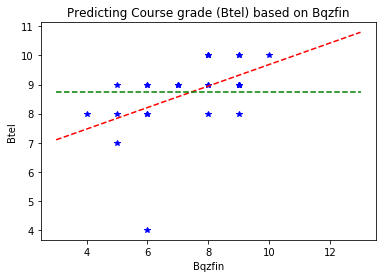

In [118]:
cor, p = st.pearsonr(df_drop['Bqzfin'], df_drop['Btel'])
print('cor coef= ', cor, ' p = ',p)


# Fit linear regression model 
slope, intercept, r_value, p_value, std_err = st.linregress(df_drop['Bqzfin'], df_drop['Btel'])

# Results onscreen
print("slope: %f, intercept: %f" %(slope, intercept))
print("r_value: %f, p_value: %f" %(r_value, p_value))
print("std_err: %f" %(std_err))
print("r-squared (determination coef): %f"%(r_value**2))

# Plot data
plt.xlabel('Bqzfin')
plt.ylabel('Btel')
plt.title("Predicting Course grade (Btel) based on Bqzfin")
plt.plot(df_drop['Bqzfin'], df_drop['Btel'], 'b*')

# Plot regression line
x_axis = np.linspace(3,13,11)
y_axis = intercept + slope*x_axis         
plt.plot(x_axis, y_axis, 'r--') 

# add line of mean
from statistics import mean 
mn = mean(df_drop['Btel'])
print('Btel mean =', mn)
x_axis = np.linspace(3,13,11)
y_axis = 0*x_axis+mn
plot = plt.plot(x_axis, y_axis, 'g--')

**Conclusions** 

In [124]:
#Regarding A.1, we notice that the r-squared value is 0.000804, which is essentially 0%, so under no circumstance can we 
#consider Bqmn a correct predictor for Bqzfin. We can also notice this from the corresponding scatter plot.
#Regarding A.2, the result of the r-squared value is 0.247, which is nearly 25%. So we cannot consider Bqzfin 
#a reliable predictor for the final course grade, but, certainly, it is of higher value to us than the result of A.1.
#Also, the scatter plot of A.2 appears to be more accurate than this of A.1.

### B) Prepare a df by filling all cells with missing data with the mean value of other non-empty cells (df_fill)

In [119]:
df_mean = df.mean()
df_fill = df.fillna(df_mean)
df_fill

,Student,B1,B2,B3,B4,Bqzfin,Btel
0,s1,7.002200,4.719687,6.960784,7.000000,7.074534,7.629139
1,s2,10.000000,4.719687,6.960784,6.085714,7.074534,7.629139
2,s3,7.002200,9.230769,10.000000,9.000000,7.074534,7.629139
3,s4,6.666667,4.615385,6.000000,7.000000,7.000000,9.000000
4,s5,9.444444,9.230769,9.000000,10.000000,7.000000,9.000000
5,s6,7.002200,4.719687,6.960784,6.085714,6.000000,7.000000
6,s7,7.002200,4.719687,6.960784,6.085714,9.000000,9.000000
7,s8,7.002200,4.719687,6.960784,6.085714,5.000000,8.000000
8,s9,7.002200,4.719687,6.960784,6.085714,7.000000,2.000000
9,s10,6.111111,4.719687,6.960784,6.085714,5.000000,7.000000


**B.1) Explore whether Bqmn is a predictor of students grade for the final quiz (Bqzfin)**

cor coef=  0.09138305099378184  p =  0.21604640069355982
slope: 0.169809, intercept: 6.023061
r_value: 0.091383, p_value: 0.216046
std_err: 0.136788
r-squared (determination coef): 0.008351
Bqzfin mean = 7.074534161490683


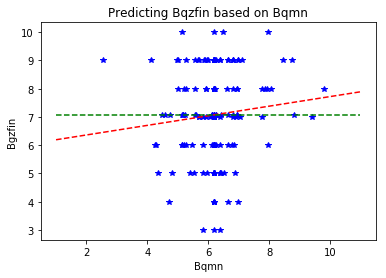

In [122]:
df_fill = df_fill.assign(Bqmn = df_fill.iloc[:,1:5].mean(axis=1)) 
cor, p = st.pearsonr(df_fill['Bqmn'], df_fill['Bqzfin'])
print('cor coef= ', cor, ' p = ',p)


# Fit linear regression model 
slope, intercept, r_value, p_value, std_err = st.linregress(df_fill['Bqmn'], df_fill['Bqzfin'])

# Results onscreen
print("slope: %f, intercept: %f" %(slope, intercept))
print("r_value: %f, p_value: %f" %(r_value, p_value))
print("std_err: %f" %(std_err))
print("r-squared (determination coef): %f"%(r_value**2))

# Plot data
plt.xlabel('Bqmn')
plt.ylabel('Bgzfin')
plt.title("Predicting Bqzfin based on Bqmn")
plt.plot(df_fill['Bqmn'], df_fill['Bqzfin'], 'b*')

# Plot regression line
x_axis = np.linspace(1,11,11)
y_axis = intercept + slope*x_axis         
plt.plot(x_axis, y_axis, 'r--') 

# add line of mean
from statistics import mean 
mn = mean(df_fill['Bqzfin'])
print('Bqzfin mean =', mn)
x_axis = np.linspace(1,11,11)
y_axis = 0*x_axis+mn
plot = plt.plot(x_axis, y_axis, 'g--')

**B.2) Explore whether Bqzfin is a predictor of students grade for the Course**

cor coef=  0.351528464408585  p =  9.276370800092492e-07
slope: 0.450731, intercept: 4.440426
r_value: 0.351528, p_value: 0.000001
std_err: 0.088734
r-squared (determination coef): 0.123572
Btel mean = 7.629139072847682


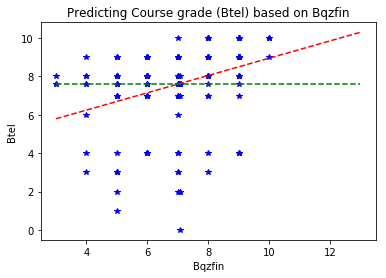

In [123]:
cor, p = st.pearsonr(df_fill['Bqzfin'], df_fill['Btel'])
print('cor coef= ', cor, ' p = ',p)


# Fit linear regression model 
slope, intercept, r_value, p_value, std_err = st.linregress(df_fill['Bqzfin'], df_fill['Btel'])

# Results onscreen
print("slope: %f, intercept: %f" %(slope, intercept))
print("r_value: %f, p_value: %f" %(r_value, p_value))
print("std_err: %f" %(std_err))
print("r-squared (determination coef): %f"%(r_value**2))

# Plot data
plt.xlabel('Bqzfin')
plt.ylabel('Btel')
plt.title("Predicting Course grade (Btel) based on Bqzfin")
plt.plot(df_fill['Bqzfin'], df_fill['Btel'], 'b*')

# Plot regression line
x_axis = np.linspace(3,13,11)
y_axis = intercept + slope*x_axis         
plt.plot(x_axis, y_axis, 'r--') 

# add line of mean
from statistics import mean 
mn = mean(df_fill['Btel'])
print('Btel mean =', mn)
x_axis = np.linspace(3,13,11)
y_axis = 0*x_axis+mn
plot = plt.plot(x_axis, y_axis, 'g--')

**Conclusions**

In [126]:
#Regarding B.1, we notice that the r-squared value is 0.008351, which is essentially 0.8%, that is again restrictive for 
#considering Bqmn a correct predictor for Bqzfin. We can also notice this from the corresponding scatter plot.
#Regarding B.2, the result of the r-squared value is 0.123572, which is equal to 12%. So we cannot consider Bqzfin 
#a reliable predictor for the final course grade and it is certainly of lower value to us than the result of B.2 
#(which was 25%).
#The same conclusions are drawn from the Pearsonr correlation results.
#So using mean values for the empty cells didn't improve the predictive model in regards to droping the empty records.
#In both of those ways, the predictors were not accurate enough.